In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import sqlite3
import pandas as pd

In [31]:
conn = sqlite3.connect(r'C:\Users\Owner\dev\algobetting\infra\data\db\algobetting.db')

df = pd.read_sql_query("SELECT * FROM fbref_player_stats", conn)

df["is_FW"] = df["position"].str.contains("FW", case=False).astype(int)
df["pass*touches_def_3rd"] = df["passes"].astype(int) * df["touches_def_3rd"].astype(int)
df["shots_squared"] = df["shots"].astype(int) * df["shots"].astype(int)

df

,player,team,opponent,is_home,match_date,division,season,match_url,shirtnumber,nationality,...,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,is_FW,pass*touches_def_3rd,shots_squared
0,Jamie Vardy,Leicester City,Newcastle Utd,1,2025-04-07,Premier League,2024-2025,https://fbref.com/en/matches/d8efb6cc/Leiceste...,9,engENG,...,0,0,0,3,3,0,100.0,1,38,9
1,Bilal El Khannouss,Leicester City,Newcastle Utd,1,2025-04-07,Premier League,2024-2025,https://fbref.com/en/matches/d8efb6cc/Leiceste...,11,maMAR,...,0,0,0,5,0,1,0.0,0,222,1
2,Jeremy Monga,Leicester City,Newcastle Utd,1,2025-04-07,Premier League,2024-2025,https://fbref.com/en/matches/d8efb6cc/Leiceste...,93,,...,0,0,0,0,0,1,0.0,0,0,0
3,Patson Daka,Leicester City,Newcastle Utd,1,2025-04-07,Premier League,2024-2025,https://fbref.com/en/matches/d8efb6cc/Leiceste...,20,zmZAM,...,0,0,0,4,1,1,50.0,0,80,0
4,Facundo Buonanotte,Leicester City,Newcastle Utd,1,2025-04-07,Premier League,2024-2025,https://fbref.com/en/matches/d8efb6cc/Leiceste...,40,arARG,...,0,0,0,3,3,1,75.0,0,115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379,Emerson Palmieri,West Ham,Tottenham,0,2024-10-19,Premier League,Unknown,https://fbref.com/en/matches/923bfab0/Tottenha...,33,itITA,...,0,0,0,5,0,2,0.0,0,1008,1
9380,Max Kilman,West Ham,Tottenham,0,2024-10-19,Premier League,Unknown,https://fbref.com/en/matches/923bfab0/Tottenha...,26,engENG,...,0,0,0,4,0,1,0.0,0,588,0
9381,Jean-Clair Todibo,West Ham,Tottenham,0,2024-10-19,Premier League,Unknown,https://fbref.com/en/matches/923bfab0/Tottenha...,25,frFRA,...,0,0,0,2,1,0,100.0,0,1116,0
9382,Aaron Wan-Bissaka,West Ham,Tottenham,0,2024-10-19,Premier League,Unknown,https://fbref.com/en/matches/923bfab0/Tottenha...,29,engENG,...,0,0,0,4,2,0,100.0,0,1539,1


In [35]:
X = df[["minutes", "shots", "shots_on_target", "pens_made", "touches_att_pen_area", "passes", "touches_def_3rd", "pass*touches_def_3rd", "is_FW", "shots_squared", "cards_yellow"]].astype(int)
y = df["xg"]

#X_with_const = sm.add_constant(X)
model = sm.OLS(y, X).fit()  # No X_with_const
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                     xg   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              1820.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:55:33   Log-Likelihood:                          5714.9
No. Observations:                9384   AIC:                                 -1.141e+04
Df Residuals:                    9373   BIC:                                 -1.133e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Correlation matrix:
                  shots  shots_squared        xg
shots          1.000000       0.892243  0.670207
shots_squared  0.892243       1.000000  0.609974
xg             0.670207       0.609974  1.000000


Text(0, 0.5, 'Expected Goals (xG)')

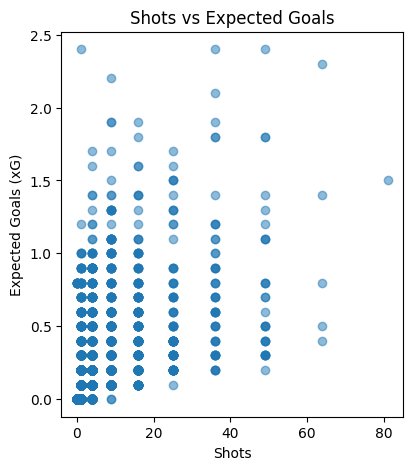

In [34]:
df['shots_squared'] = df['shots'] ** 2

# Basic correlation analysis
correlation_matrix = df[['shots', 'shots_squared', 'xg']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize relationships
plt.figure(figsize=(15, 5))

# 1. Scatter plot of shots vs xG
plt.subplot(1, 3, 1)
plt.scatter(df['shots_squared'], df['xg'], alpha=0.5)
plt.title('Shots vs Expected Goals')
plt.xlabel('Shots')
plt.ylabel('Expected Goals (xG)')